<h1 align=center><font size = 5>COVID-19: Case Analysis by Austin Zip Code</font></h1>

## Introduction

The Austin Public Health website regularly publishes the number of new confirmed cases by zip code. Unfortunately, this data is not presented over time, nor is the cumulative data by zip code available. So, I have manually scraped a few resources, as they were represented visually in a map, from news websites for data before Memorial Day Weekend, a couple of weeks after and at the end of June. This data is part of a file I created and is uploaded to my repository, named "COVID19_Cases_By_ZipCode.csv".

I'm interested in seeing how the data changes over time and if there are noticeable anomalies from one zip code to the other. Unfortunately, I was unable to find demographic data, such as age, for these cases or mortality/ recovered numbers.

## Data Wrangling

As the CSV is manually generated, my first set of steps is to read the data and conduct some basic visualization.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('pandas={}'.format(pd.__version__))
print('numpy={}'.format(np.__version__))

pandas=1.0.4
numpy=1.18.5


In [2]:
# Create Dataframe from CSV file

filename = "COVID19_Cases_By_ZipCode.csv"
df_aus = pd.read_csv(filename)

df_aus.head(5)

,Zip Code,5/23/20,6/9/20,6/30/20
0,78701,39,49,121
1,78702,40,59,225
2,78703,43,46,108
3,78704,109,148,347
4,78705,62,68,161


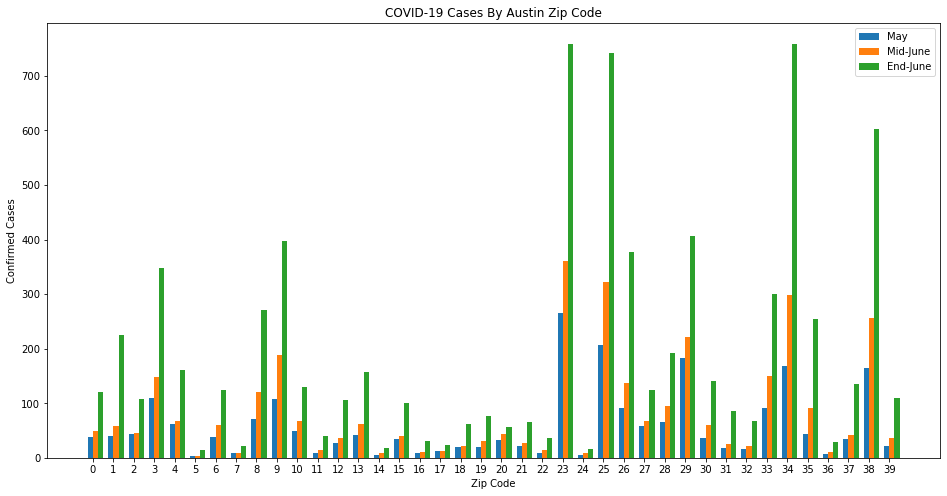

In [3]:
# Create Comparison Bar Chart

index = np.arange(40)
bar_width = 0.25

fig, ax = plt.subplots(figsize = (16,8))
bar1 = ax.bar(index, df_aus["5/23/20"].values, bar_width, label="May")
bar2 = ax.bar(index+bar_width, df_aus["6/9/20"].values, bar_width, label="Mid-June")
bar3 = ax.bar(index+bar_width+bar_width, df_aus["6/30/20"].values, bar_width, label="End-June")

ax.set_xlabel('Zip Code')
ax.set_ylabel('Confirmed Cases')
ax.set_title('COVID-19 Cases By Austin Zip Code')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_aus.index)
ax.legend()

plt.show()

## Initial Thoughts and Specialized Visualization

With a dataset containing 40 zip codes, visualizing them together is difficult to truly understand which zip codes truly stand out. So, the next step is to visualize using a smaller dataset. Below are the next set of tasks:

<ul><li>Reduce dataframe to ten zip codes with the largest confirmed cases and plot
    <li>Check if any zip codes fall out of top ten group 
    <li>Produce choroplethe map highlighting cumulative case differences by zip code
</ul>

In [6]:
# Create top ten dataframes for each Peroid

df_top_may = df_aus.sort_values('5/23/20', ascending=False).head(10)
df_top_may = df_top_may.sort_values('Zip Code', ascending=True)

df_top_jun = df_aus.sort_values('6/9/20', ascending=False).head(10)
df_top_jun = df_top_jun.sort_values('Zip Code', ascending=True)

df_top_jul = df_aus.sort_values('6/30/20', ascending=False).head(10)
df_top_jul = df_top_jul.sort_values('Zip Code', ascending=True)

df_top_jul.head(5)

,Zip Code,5/23/20,6/9/20,6/30/20
3,78704,109,148,347
8,78723,71,120,271
9,78724,107,188,397
23,78741,266,361,759
25,78744,207,323,742


In [7]:
# Check if top ten Zip Codes are in all dataframes

np.where((df_top_may['Zip Code'].values == df_top_jun['Zip Code'].values) & 
         (df_top_jun['Zip Code'].values == df_top_jul['Zip Code'].values), 'True', 'False')

array(['True', 'True', 'True', 'True', 'True', 'True', 'True', 'True',
       'True', 'True'], dtype='<U5')

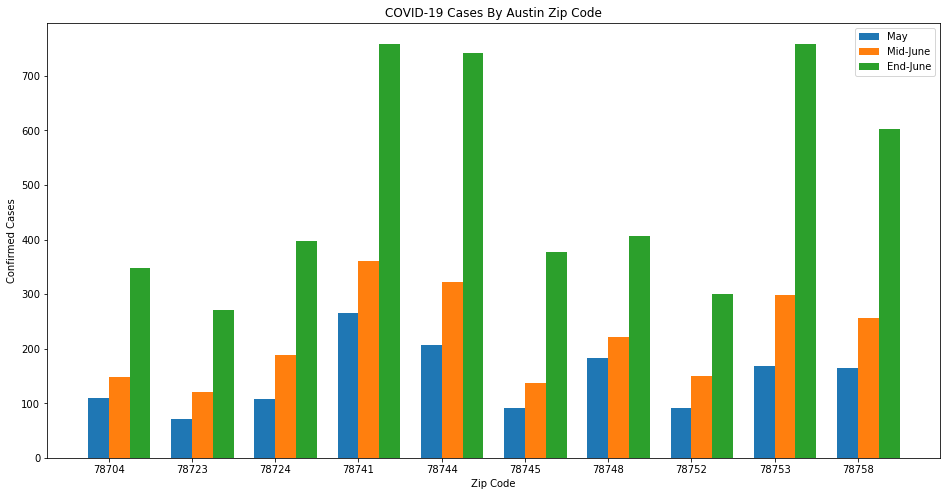

In [8]:
# Create Comparison Bar Chart

index = np.arange(10)
bar_width = 0.25

fig, ax = plt.subplots(figsize = (16,8))
bar1 = ax.bar(index, df_top_jul["5/23/20"].values, bar_width, label="May")
bar2 = ax.bar(index+bar_width, df_top_jul["6/9/20"].values, bar_width, label="Mid-June")
bar3 = ax.bar(index+bar_width+bar_width, df_top_jul["6/30/20"].values, bar_width, label="End-June")

ax.set_xlabel('Zip Code')
ax.set_ylabel('Confirmed Cases')
ax.set_title('COVID-19 Cases By Austin Zip Code')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_top_jul['Zip Code'])
ax.legend()

plt.show()

In [9]:
# Create top ten dataframe based on Sum

df_sum = df_aus.sum(axis=1).reset_index()
df_sum.columns = ['Zip Code', 'Cases']

df_top_sum = df_sum.sort_values('Cases', ascending=False).head(10)
df_top_sum.head(5)

,Zip Code,Cases
23,23,80127
25,25,80016
34,34,79978
38,38,79782
29,29,79559


In [31]:
# Load Libraries for Choropleth Mapping for Cases by Zip Code

import folium as folium
from folium import plugins
import json

print('Folium and JSON imported')

Folium and JSON imported


In [71]:
# Generate Choropleth Map

# Read GeoJSON File
aus_geo = r'austin_area_zip_codes.geojson'

# Convert Zip Code column to string
df_aus[['Zip Code']] = df_aus[['Zip Code']].astype(str)

# Setup Map
aus_map = folium.Map([30.26759, -97.74299], zoom_start=11)

aus_map.choropleth(
    geo_data = aus_geo,
    fill_opacity = 0.8,
    line_opacity = 0.2,
    data = df_aus,
    columns = ['Zip Code', '6/30/20'],
    key_on = 'feature.properties.zipcode',
    fill_color = 'BuGn',
    legend_name = 'Confirmed COVID-19 Cases by Zip Code, 06/30/2020',
    highlight = True
)

aus_map.add_child(
    folium.features.GeoJsonTooltip(['Zip Code', 'Cases'], labels = True))

folium.LayerControl(collapsed=True).add_to(aus_map)

# Display Map
aus_map

AttributeError: module 'folium' has no attribute 'GeoJsonTooltip'